reading dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("../datasets/agricultural_dataset.csv")
df.head(10)

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22
5,Ajwan,Madhya Pradesh,Neemuch,Neemuch,80.00,132.00,95.00,2019-05-22
6,Ajwan,Rajasthan,Chittorgarh,Nimbahera,9.77,9.95,9.80,2019-05-22
7,Ajwan,Rajasthan,Chittorgarh,Pratapgarh,100.50,120.90,110.70,2019-05-22
8,Alasande+Gram,Karnataka,Bagalkot,Bagalakot,46.01,46.50,46.46,2019-05-22
9,Alasande+Gram,Karnataka,Bangalore,Bangalore,48.00,53.00,50.50,2019-05-22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836977 entries, 0 to 836976
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  836976 non-null  object 
 1   state           836977 non-null  object 
 2   district        836977 non-null  object 
 3   market          836977 non-null  object 
 4   min_price       836976 non-null  float64
 5   max_price       836976 non-null  float64
 6   modal_price     836976 non-null  float64
 7   date            836976 non-null  object 
dtypes: float64(3), object(5)
memory usage: 51.1+ MB


### Feature Engineering

In [4]:
df.isna().sum()

commodity_name    1
state             0
district          0
market            0
min_price         1
max_price         1
modal_price       1
date              1
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,commodity_name,state,district,market,min_price,max_price,modal_price,date
834337,its,1.50,3000,5000,NaN,NaN,NaN,NaN
834417,NaN,Uttar Pradesh,Kanpur,Kanpur(Grain),6600.0,6800.0,6700.0,12 Oct 2021


In [6]:
df = df.dropna().reset_index(drop=True)

In [7]:
df.isna().sum()

commodity_name    0
state             0
district          0
market            0
min_price         0
max_price         0
modal_price       0
date              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836975 entries, 0 to 836974
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  836975 non-null  object 
 1   state           836975 non-null  object 
 2   district        836975 non-null  object 
 3   market          836975 non-null  object 
 4   min_price       836975 non-null  float64
 5   max_price       836975 non-null  float64
 6   modal_price     836975 non-null  float64
 7   date            836975 non-null  object 
dtypes: float64(3), object(5)
memory usage: 51.1+ MB


In [9]:
df['commodity_name'].value_counts()

commodity_name
Onion            44908
Tomato           42715
Wheat            41172
Potato           37810
Brinjal          33687
                 ...  
Butter               3
Lukad                2
Almond(Badam)        1
Sunhemp              1
Siddota              1
Name: count, Length: 248, dtype: int64

In [10]:
df.iloc[0]

commodity_name         Ajwan
state                Gujarat
district              Amreli
market                Amreli
min_price              63.25
max_price              79.55
modal_price            79.55
date              2019-05-22
Name: 0, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder

le_commodity_name = LabelEncoder()

df['commodity_name'] = le_commodity_name.fit_transform(df['commodity_name'])

In [51]:
import pickle
with open('../models/le_commodity_name.pkl','wb') as file:
    pickle.dump(le_commodity_name,file)

In [12]:
df.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,0,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,0,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22
2,0,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22
3,0,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22
4,0,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22


In [13]:
le_state = LabelEncoder()
df['state'] = le_state.fit_transform(df['state'])

In [52]:
import pickle
with open('../models/le_state.pkl','wb') as file:
    pickle.dump(le_state,file)

In [14]:
df.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,0,5,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,0,5,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22
2,0,5,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22
3,0,5,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22
4,0,5,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22


In [15]:
le_district=LabelEncoder()
df['district']=le_district.fit_transform(df['district'])

In [53]:
import pickle
with open('../models/le_district.pkl','wb') as file:
    pickle.dump(le_district,file)

In [16]:
df.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,0,5,15,Amreli,63.25,79.55,79.55,2019-05-22
1,0,5,39,Dhanera,80.05,80.05,80.05,2019-05-22
2,0,5,206,Jamnagar,90.00,155.00,122.50,2019-05-22
3,0,5,304,Kadi,94.50,112.50,107.00,2019-05-22
4,0,5,304,Unjha,21.25,148.50,99.75,2019-05-22


In [17]:
le_market = LabelEncoder()
df['market'] = le_market.fit_transform(df['market'])

In [54]:
import pickle
with open('../models/le_market.pkl','wb') as file:
    pickle.dump(le_market,file)

In [18]:
df.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,0,5,15,78,63.25,79.55,79.55,2019-05-22
1,0,5,39,593,80.05,80.05,80.05,2019-05-22
2,0,5,206,934,90.00,155.00,122.50,2019-05-22
3,0,5,304,999,94.50,112.50,107.00,2019-05-22
4,0,5,304,2278,21.25,148.50,99.75,2019-05-22


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836975 entries, 0 to 836974
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  836975 non-null  int64  
 1   state           836975 non-null  int64  
 2   district        836975 non-null  int64  
 3   market          836975 non-null  int64  
 4   min_price       836975 non-null  float64
 5   max_price       836975 non-null  float64
 6   modal_price     836975 non-null  float64
 7   date            836975 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 51.1+ MB


In [20]:
top_date = df.iloc[:825914]['date'].str.split('-',expand= True)
top_date.rename(columns= {0:'year',1:'month',2:'date'},inplace=True)
top_date.head()


,year,month,date
0,2019,05,22
1,2019,05,22
2,2019,05,22
3,2019,05,22
4,2019,05,22


In [21]:
bot_date = df.iloc[825914:]['date'].str.split(expand= True)
bot_date.rename(columns= {0:'date',1:'month',2:'year'},inplace=True)
bot_date['month']='10'
bot_date.head()

,date,month,year
825914,27,10,2021
825915,27,10,2021
825916,27,10,2021
825917,05,10,2021
825918,05,10,2021


In [22]:
new_date = pd.concat([top_date,bot_date])
new_date['month'].value_counts()

month
07    130519
05     91643
09     89001
10     87838
08     83178
11     82289
12     80933
06     78501
03     63723
04     49350
Name: count, dtype: int64

In [23]:
df.drop(columns=['date'],inplace=True)
df = pd.concat([df,new_date],axis=1)
df.tail()

,commodity_name,state,district,market,min_price,max_price,modal_price,year,month,date
836970,14,5,63,930,5100.0,5500.0,5300.0,2021,10,06
836971,14,5,378,942,3500.0,5500.0,5000.0,2021,10,06
836972,14,5,378,1832,5300.0,6225.0,5650.0,2021,10,06
836973,14,5,219,2352,4750.0,5750.0,5250.0,2021,10,06
836974,14,11,239,1595,10500.0,11500.0,11000.0,2021,10,06


In [24]:
df['date'] = df['date'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836975 entries, 0 to 836974
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  836975 non-null  int64  
 1   state           836975 non-null  int64  
 2   district        836975 non-null  int64  
 3   market          836975 non-null  int64  
 4   min_price       836975 non-null  float64
 5   max_price       836975 non-null  float64
 6   modal_price     836975 non-null  float64
 7   year            836975 non-null  int64  
 8   month           836975 non-null  int64  
 9   date            836975 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 63.9 MB


In [26]:
df.corr()['modal_price']

commodity_name   -0.107382
state            -0.029918
district          0.003948
market            0.010154
min_price         0.691707
max_price         0.755211
modal_price       1.000000
year              0.107744
month             0.059459
date             -0.002269
Name: modal_price, dtype: float64

In [27]:
df.describe()

,commodity_name,state,district,market,min_price,max_price,modal_price,year,month,date
count,836975.000000,836975.000000,836975.000000,836975.000000,836975.000000,836975.000000,836975.000000,836975.000000,836975.000000,836975.000000
mean,121.204275,18.937677,227.901907,1168.011076,138.438275,158.557311,117.531131,2019.589298,7.709443,16.935655
std,73.333806,8.080636,139.521641,685.278854,1622.378214,1710.394446,1230.076670,0.911770,2.690173,8.834968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,3.000000,1.000000
25%,43.000000,11.000000,115.000000,588.000000,12.000000,15.500000,14.100000,2019.000000,6.000000,9.000000
50%,128.000000,22.000000,223.000000,1178.000000,20.000000,25.000000,22.650000,2019.000000,8.000000,18.000000
75%,181.000000,26.000000,348.000000,1779.000000,37.500000,45.000000,41.000000,2021.000000,10.000000,24.000000
max,247.000000,28.000000,485.000000,2390.000000,80200.000000,74240.000000,66000.000000,2021.000000,12.000000,31.000000


### Data Visualisation

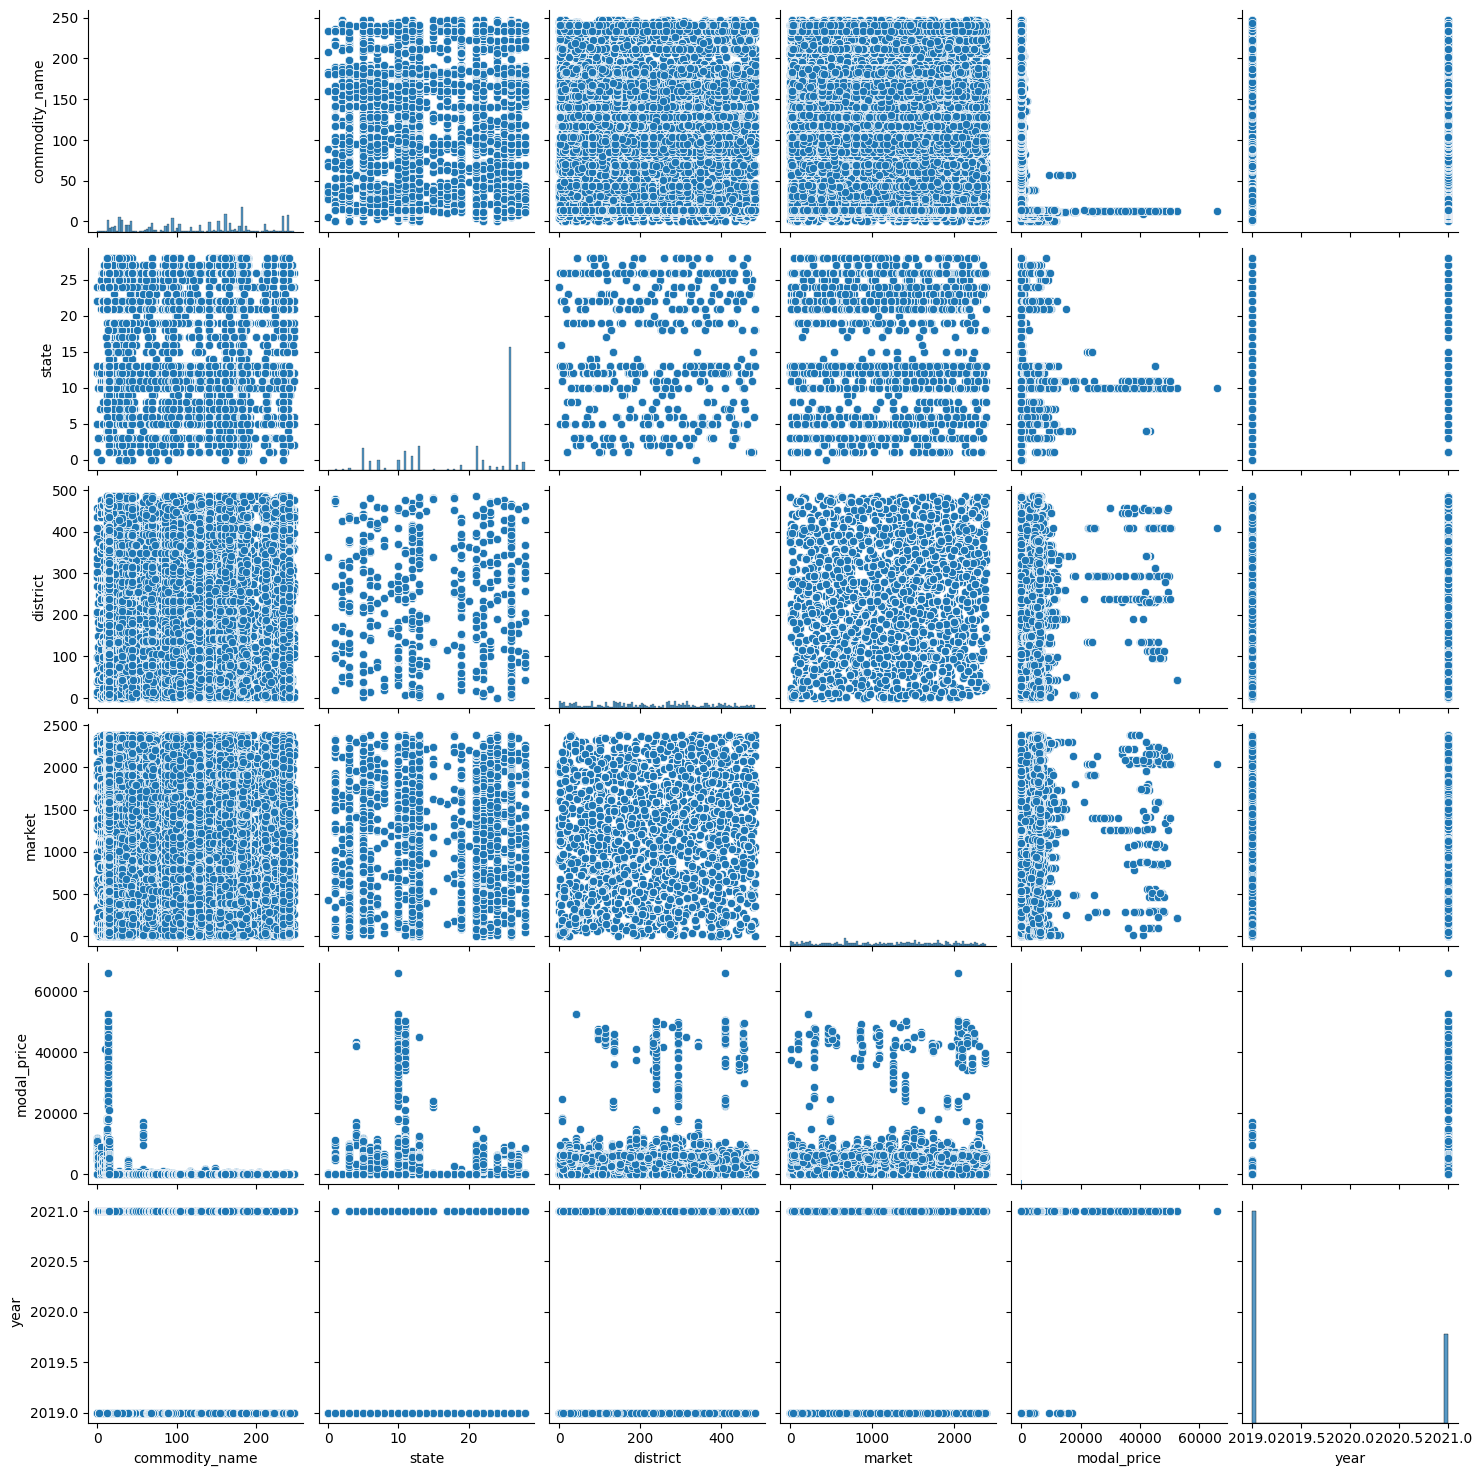

In [30]:
import seaborn as sns

sns.pairplot(df.drop(columns=['min_price','max_price','month','date']))


### Train Test Split and Scaling

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['min_price','max_price','modal_price'])
y = df['modal_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [38]:
X_train.head()

,commodity_name,state,district,market,year,month,date
609812,160,21,16,31,2021,3,19
610261,140,10,30,174,2021,3,24
716013,21,26,159,1623,2021,5,4
526157,73,11,287,1236,2019,11,22
53498,69,26,317,1154,2019,6,12


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [55]:
import pickle
with open('../models/scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [40]:
X_train

array([[ 0.5286363 ,  0.25566348, -1.51892921, ...,  1.54875223,
        -1.75302767,  0.23340865],
       [ 0.25588129, -1.10551606, -1.41858474, ...,  1.54875223,
        -1.75302767,  0.79914083],
       [-1.36701099,  0.87438146, -0.49398209, ...,  1.54875223,
        -1.00899582, -1.46378788],
       ...,
       [ 0.46044754,  0.87438146, -0.10693913, ..., -0.64568107,
        -0.63697989,  1.364873  ],
       [ 0.6922893 ,  0.25566348,  0.56680234, ...,  1.54875223,
        -0.26496396, -1.35064144],
       [ 0.92413106,  0.25566348, -1.27523549, ..., -0.64568107,
        -0.26496396,  1.25172657]], shape=(627731, 7))

In [41]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = linear_reg.predict(X_test)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

r2_score(y_test,y_pred)

0.04864367142893522

In [45]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
r2_score(y_test,y_pred)

0.6191336392947918

In [46]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(
    n_neighbors=9,
    n_jobs=-1
)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
r2_score(y_test,y_pred)

0.4836076440657324

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
r2_score(y_test,y_pred)

0.6722606454139557

In [48]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor()

hgb.fit(X_train,y_train)
y_pred = hgb.predict(X_test)
r2_score(y_test,y_pred)

0.7707962355121329

In [50]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_jobs = -1)

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
r2_score(y_test,y_pred)

0.7719969859055603

In [56]:
import pickle
with open('../models/model.pkl','wb') as file:
    pickle.dump(xgb,file)